## This notebook includes a general workflow for a PEST run

* The model used is a MODFLOW-2005 model based on a MODFLOW-2000 model publicly available at https://pubs.usgs.gov/wri/wri02-4200/, and has been described in a USGS report published in 2002 titled "SIMULATION OF GROUND-WATER FLOW IN THE MIDDLE RIO GRANDE BASIN BETWEEN COCHITI AND SAN ACACIA, NEW MEXICO", written by hydrologists at the New Mexico Water Science Center. 

* To create the PEST files for this model, the publicly available PEST files for a 2011 report were used as a template: Hydrogeologic Setting and Groundwater-Flow Simulation of the Middle Rio Grande Basin Regional Study Area, New Mexico, by L.M. Bexfield, C.E. Heywood, L.J. Kauffman, G.W. Rattray, and E.T. Vogler 

* This workflow is only set up to calibrate against heads, and is based on a similar workflow in the pyEMU repo



## The objectives of this notebook are to:

1) Run PEST++ to minimize the measurement objective function

2) Look at typical summary statistics and plots that describe the degree of fit

3) Look at how head data constraints ripple to different forecast types (not completed)

## Standard two blocks to prep the notebook

In [1]:
# Import all the required modules

%matplotlib inline
import os
import sys
sys.path.append("..")
import shutil
import platform

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyemu
import flopy

# print versions
print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('pandas version: {}'.format(pd.__version__))
print('flopy version: {}'.format(flopy.__version__))
#print('pyemu version: {}'.format(pyemu.__version__))

2.7.14 | packaged by conda-forge | (default, Dec 25 2017, 01:18:54) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
numpy version: 1.13.3
matplotlib version: 2.1.2
pandas version: 0.22.0
flopy version: 3.2.8


In [2]:
# add path to MODFLOW executable

loadpth = 'MF2005_dbl'
version = 'mf2005'

if platform.system() == 'Windows':
    exe_name = r'D:\Work\exec_Win\MF2005.1_12\bin\mf2005dbl'
    exe_name += '.exe'
else:
    exe_name = '/Volumes/A_2TB/Work/exec_Mac/mf2005dbl'

* The next 3 cells are optional: they're meant to check if Modflow is running as expected, so there are no errors when PEST++ runs the model

In [3]:
m = flopy.modflow.Modflow.load('name.nam',model_ws=loadpth,exe_name=exe_name,
                                    version=version,check=False)

In [4]:
# check the details of the model
m

MODFLOW 9 layer(s), 156 row(s), 80 column(s), 52 stress period(s)

In [8]:
# this cell was run on an unmodified MF-2K executable; its included here to demonstrate the error with the MF-2K model
m.run_model()

FloPy is using the following executable to run the model: /Volumes/A_2TB/Work/exec_Mac/mf2000

                                  MODFLOW-2000
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.19.01 03/25/2010                      

 Using NAME file: name.nam                                                                                                                                                                                                
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/03/13 13:54:37


 Error condition or warning reported

 File "mf2kerr.p00" contains a description of the error or warning


(False, [])

 - The error reads:
 *****   SOLUTION DID NOT CONVERGE FOR HEADS   *****
 ***** FOR TIME STEP   5 IN STRESS PERIOD   15 *****

In [5]:
# run model - runs on MF-2005dbl executable

m.run_model()

FloPy is using the following executable to run the model: D:\Work\exec_Win\MF2005.1_12\bin\mf2005dbl.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: name.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/03/14 14:01:10

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time ste

 Solving:  Stress period:    14    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    14    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    14    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    14    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    14    Time step:     8    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:    15    Time step:     8    Ground-Wa

 Solving:  Stress period:    31    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    31    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:    32    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    32    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    32    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    33    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    33    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:    33    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:    33    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:    33    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:    34    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:    34    Time step:     2    Ground-Wa

(True, [])

### Create PEST instruction file

* We need to create an instruction file for PEST to specify the simulated equivalents.

* To do this in MF-2005, use the sim._os head observation output DATA file

* To do this in MF-2K, make sure that the OUTNAM variable in the OBS package has a name (I've used sim).

* We will use the 'sim._os' file as input to a pyEMU helper function to create an instruction file

* I deleted a few extra observations from the sim._os file towards the end

* I created this on a Mac because of a bug in pyemu, and also because the hob_to_instruction_file has been written for >= MF-2005 versions, and I could not figure out where the pyemu folder was stored on Schmindows!!

In [ ]:
hob = pyemu.gw_utils.modflow_hob_to_instruction_file(os.path.join(m.model_ws,'sim._os'))

### Create PEST template file

* This was done manually; although pyEMU has some automated functionality to create template files, I don't think it can be used for the parameters specified in the LPF package for the MRGB model.

* Here I manually created a PVAL package, and used that to create a template file, following the approach used in Bexfield et al., 2011



In [7]:
working_dir = 'MF2005_dbl'
pst_name = 'mrgb05.pst'

In [8]:
# read in the pest file if its already created; if not go to next cell
pst = pyemu.Pst(os.path.join(working_dir, pst_name))

### Build a PEST control file using the instruction and template files

In [28]:
os.getcwd()

'D:\\Work\\RSJ\\Models\\pyEMU_examples\\MRGB_2K\\Notebooks\\pest_run'

In [12]:
# make sure that inscheck and tempcheck are in the MF2005_dbl folder
os.chdir('MF2005_dbl')
io_files = pyemu.helpers.parse_dir_for_io_files('.')
pst = pyemu.Pst.from_io_files(*io_files)
os.chdir('..')
io_files

run():inschek.exe sim._os.ins sim._os


(['pval.par.tpl'], ['pval.par'], ['sim._os.ins'], ['sim._os'])

In [13]:
# create a forward_run script to let PEST++ run the MF model
pst.model_command = ['python forward_run.py']

In [32]:
pst.write(os.path.join(working_dir,pst_name))

* I've made changes to the PST control file, taking pointers from Bexfield et al., 2011 - these changes have been automated

### Edit parameter_groups section

In [14]:
pst.parameter_groups

,pargpnme,inctyp,derinc,derinclb,forcen,derincmul,dermthd,splitthresh,splitreldiff,splitaction
pargp,pargp,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller


In [15]:
pst.parameter_groups.loc["ha",:] = pst.parameter_groups.loc["pargp",:]
pst.parameter_groups.loc["hk1",:] = pst.parameter_groups.loc["pargp",:]
pst.parameter_groups.loc["vk",:] = pst.parameter_groups.loc["pargp",:]
pst.parameter_groups.loc["ss",:] = pst.parameter_groups.loc["pargp",:]
pst.parameter_groups.loc["sy",:] = pst.parameter_groups.loc["pargp",:]

pst.parameter_groups.loc["pargp","pargpnme"] = "hk"
pst.parameter_groups.loc["ha","pargpnme"] = "ha"
pst.parameter_groups.loc["hk1","pargpnme"] = "hk1"
pst.parameter_groups.loc["vk","pargpnme"] = "vk"
pst.parameter_groups.loc["ss","pargpnme"] = "ss"
pst.parameter_groups.loc["sy","pargpnme"] = "sy"

pst.parameter_groups.rename(index={"pargp":"hk"},inplace=True)

pst.parameter_groups
#pst.parameter_groups.append(pst.parameter_groups.loc[0]

,pargpnme,inctyp,derinc,derinclb,forcen,derincmul,dermthd,splitthresh,splitreldiff,splitaction
hk,hk,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller
ha,ha,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller
hk1,hk1,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller
vk,vk,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller
ss,ss,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller
sy,sy,relative,0.01,0.0,switch,2.0,parabolic,0.00001,0.5,smaller


In [16]:
pst.parameter_groups.loc[:,"derinc"] = 5.00e-2
pst.parameter_groups.loc[:,"derincib"] = 1.00e-2
pst.parameter_groups.loc[:,"forcen"] = "always_2"
pst.parameter_groups

,pargpnme,inctyp,derinc,derinclb,forcen,derincmul,dermthd,splitthresh,splitreldiff,splitaction,derincib
hk,hk,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01
ha,ha,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01
hk1,hk1,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01
vk,vk,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01
ss,ss,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01
sy,sy,relative,0.05,0.0,always_2,2.0,parabolic,0.00001,0.5,smaller,0.01


### Edit parameter_data section

In [17]:
# check out the pst instance
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
haniyes,haniyes,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
hanino,hanino,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
hanitrf,hanitrf,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
vani1,vani1,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
vani2,vani2,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
vani3,vani3,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
vani4,vani4,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
ssall,ssall,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
syall,syall,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
knw,knw,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1


In [18]:
pst.parameter_data.iloc[0:3,6] = "ha"
pst.parameter_data.iloc[3:7,6] = "vk"
pst.parameter_data.iloc[7,6] = "ss"
pst.parameter_data.iloc[8,6] = "sy"
pst.parameter_data.iloc[9:16,6] = "hk"
pst.parameter_data.iloc[16:19,6] = "hk1"
pst.parameter_data.iloc[19:,6] = "hk"
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
haniyes,haniyes,log,factor,1.0,1.100000e-10,1.100000e+10,ha,1.0,0.0,1
hanino,hanino,log,factor,1.0,1.100000e-10,1.100000e+10,ha,1.0,0.0,1
hanitrf,hanitrf,log,factor,1.0,1.100000e-10,1.100000e+10,ha,1.0,0.0,1
vani1,vani1,log,factor,1.0,1.100000e-10,1.100000e+10,vk,1.0,0.0,1
vani2,vani2,log,factor,1.0,1.100000e-10,1.100000e+10,vk,1.0,0.0,1
vani3,vani3,log,factor,1.0,1.100000e-10,1.100000e+10,vk,1.0,0.0,1
vani4,vani4,log,factor,1.0,1.100000e-10,1.100000e+10,vk,1.0,0.0,1
ssall,ssall,log,factor,1.0,1.100000e-10,1.100000e+10,ss,1.0,0.0,1
syall,syall,log,factor,1.0,1.100000e-10,1.100000e+10,sy,1.0,0.0,1
knw,knw,log,factor,1.0,1.100000e-10,1.100000e+10,hk,1.0,0.0,1


In [19]:
# set noptmax = 0
pst.control_data.noptmax = 0
pst.write(os.path.join(working_dir,pst_name))

### Add observation groups and edit the observations accordingly

In [20]:
pst.observation_data

,obsnme,obsval,weight,obgnme
a001,a001,5.524717e+03,1.0,obgnme
a002,a002,5.227226e+03,1.0,obgnme
a003,a003,5.260891e+03,1.0,obgnme
a005,a005,5.465481e+03,1.0,obgnme
a006,a006,5.500308e+03,1.0,obgnme
a007,a007,5.254098e+03,1.0,obgnme
a008,a008,5.274991e+03,1.0,obgnme
a013,a013,5.222652e+03,1.0,obgnme
a014,a014,5.226906e+03,1.0,obgnme
a017,a017,5.390672e+03,1.0,obgnme


### Some general questions to answer before a PEST run

1) How many parameters are we running? 

2) How many are adjustable? 

3) How many types of observations are included?

4) How many forecasts? What types?

5) How many template (tpl) files do we have?

6) How many instruction (ins) files do we have? 

### In a seperate terminal window, run TEMPCHEK, INSCHEK and PESTCHEK on the PEST files 

In [39]:
pyemu.helpers.run("tempchek pval.par.tpl",cwd=working_dir)

run():tempchek.exe pval.par.tpl


In [40]:
pyemu.helpers.run("inschek sim._os.ins sim._os",cwd=working_dir)

run():inschek.exe sim._os.ins sim._os


### Observations don't cost any runs/computer time, so you can carry as many observations as required. 

In [21]:
pyemu.helpers.run("pestchek {0}".format(pst_name),cwd=working_dir)

run():pestchek.exe mrgb05.pst


### To run PEST++, we call a program from within the Jupyter Notebook, so you have to look at the terminal window that was used to start the notebook to see the screen report of the run.  

### When executing this next block look at the terminal window to see the run.  It will say "Simulation complete..." when finished.



In [22]:
pyemu.helpers.run("pestpp {0} ".format(pst_name),cwd=working_dir)

run():pestpp.exe mrgb05.pst


## ``PEST++`` runs the model one time 

because NOPTMAX was set to 0 to check the plumbing before burning the silicon. 

If you got a "Simulation Complete..." message in the terminal window, then we can change NOPTMAX to a higher number to minimize the measurement objective function

In [23]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax = 1
pst.write(os.path.join(working_dir,pst_name))

In [24]:
# run PESTCHEK again
pyemu.helpers.run("pestchek {0} ".format(pst_name),cwd=working_dir)

run():pestchek.exe mrgb05.pst


In [25]:
# run PEST++
pyemu.helpers.run("pestpp {0} ".format(pst_name),cwd=working_dir)

run():pestpp.exe mrgb05.pst


#### you can look at the FINAL OPTIMIZATION RESULTS in the terminal where PEST++ ran (you can also find it near the bottom of the .rec file).  Which target group(s) matter?  How was splitting the contributions to PHI accomplished in the PEST control file?

For this problem, the objective function is calculated using this equation:


## $$ \Phi = \sum_{i=1}^{n} [w_{hi} (h_m - h_s)_i ]^2 $$


where Phi is the "sum of squared weighted residuals" that we look to minimize, $w_{hi}$ is the weight for the ith head observation; $h_m$ is the measured (observed) head target; $h_s$ is the simulated head; and n is the number of observations.  If we use only heads for calibration the PHI only reflects the sum of squared weighted residuals for the observed-simulated head targets. 



### PEST may stop at fewer iterations than specified if any of the following conditions are met

(search the .rec file for OPTIMIZATION COMPLETE)


1) The maximum number of interations specified in NOPTMAX is reached

2) The fit is not getting any better based on a user-supplied closure

3) The parameters are not changing based on a user-supplied closure

4) The user killed the run, usually with a ctrl-c  (happens quite frequently)


### Let's explore the results

First let's look at the measurement objective function (Phi), which is calculated using the sum of squared weighted residuals.   


In [26]:
df_obj = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".iobj")),index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,obgnme
iteration,,,,,
0,0,0.000045,0.000045,0,0.000045
1,59,0.000044,0.000044,0,0.000044


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000146F785BF98>,
      dtype=object)

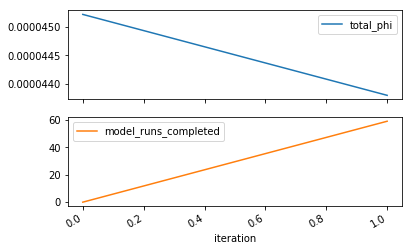

In [27]:
df_obj.loc[:,["total_phi","model_runs_completed"]].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AD7AB6390>], dtype=object)

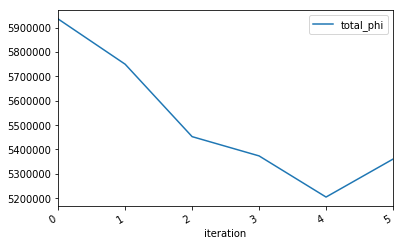

In [7]:
df_obj.loc[:,["total_phi"]].plot(subplots=True)

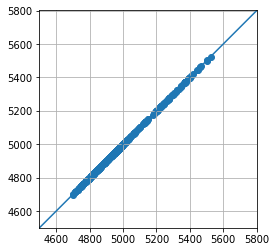

In [30]:
##  Let's evaulate the fit using the observed-simulated residuals
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
res_nz = pst.res.loc[pst.nnz_obs_names,:]
ax = plt.subplot(111,aspect="equal")
ax.scatter(res_nz.modelled,res_nz.measured)
xlim,ylim = ax.get_xlim(),ax.get_ylim()
#mx,mn = max(xlim[1],ylim[1]),min(xlim[0],ylim[0])
mx,mn = max(xlim[1],ylim[1]),4500

ax.plot([mn,mx],[mn,mx])
ax.set_xlim(mn,mx)
ax.set_ylim(mn,mx)
ax.grid()
#res_nz

### Let's look at the parameter values

In [31]:
# Now let's look at what the calibration did for uncertainty reduction

### First, let's look at the change in uncertainty in the parameters
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
df_paru

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
HANIYES,0,5,-10,10,2.779480e-06,1.208780e-06,3.619120e-07,5.197040e-06
HANINO,0,5,-10,10,1.389740e-06,7.892560e-07,-1.887720e-07,2.968250e-06
HANITRF,0,5,-10,10,6.948710e-07,5.834570e-06,-1.097430e-05,1.236400e-05
VANI1,0,5,-10,10,-3.583510e-05,2.293340e-05,-8.170180e-05,1.003160e-05
VANI2,0,5,-10,10,-1.047530e-05,5.167460e-06,-2.081020e-05,-1.403870e-07
VANI3,0,5,-10,10,-5.550320e-06,1.707910e-05,-3.970850e-05,2.860790e-05
VANI4,0,5,-10,10,9.684660e-06,1.640520e-05,-2.312580e-05,4.249520e-05
SSALL,0,5,-10,10,3.648060e-06,3.554750e-05,-6.744700e-05,7.474310e-05
SYALL,0,5,-10,10,2.987840e-05,1.222470e-03,-2.415060e-03,2.474820e-03


In [38]:
# df_paru.iloc[0]
df1 = df_paru.iloc[4:8, :]
df1

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound,prior_expt,post_expt
name,,,,,,,,,,
VANI2,0,5,-10,10,-0.000010,0.000005,-0.000021,-1.403870e-07,0,-0.000010
VANI3,0,5,-10,10,-0.000006,0.000017,-0.000040,2.860790e-05,0,-0.000006
VANI4,0,5,-10,10,0.000010,0.000016,-0.000023,4.249520e-05,0,0.000010
SSALL,0,5,-10,10,0.000004,0.000036,-0.000067,7.474310e-05,0,0.000004


Text(0.5,0,'prior and posterior')

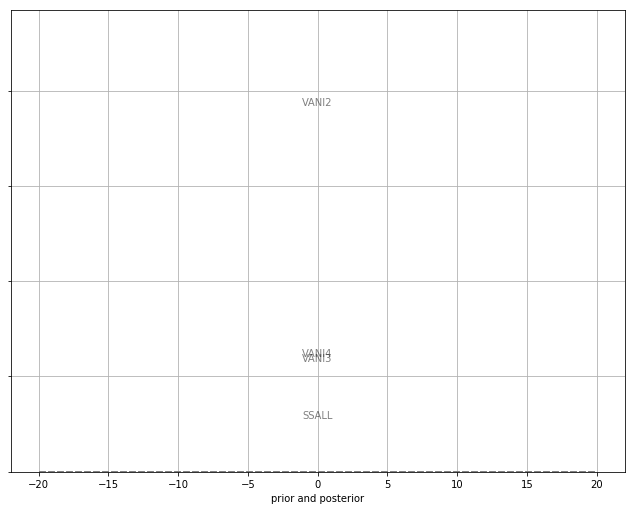

In [39]:
ax = pyemu.helpers.plot_summary_distributions(df1,label_post=True)
ax.set_xlabel("prior and posterior")
#ax = pyemu.helpers.plot_summary_distributions(df_paru,label_post=True)
#ax.set_xlabel("prior and posterior")
#ax.set_xlabel("$log_{10}(\\frac{L}{T})$")

### The dotted gray line represents the "prior" information as expressed by the parameter bounds in the PEST control file.  The shaded area is the uncertainty after the calibration.

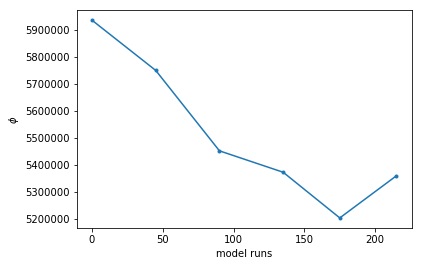

In [36]:
# another plot of the objective fn.

df = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".iobj")))
ax = plt.subplot(111)
ax.plot(df.model_runs_completed,df.measurement_phi,marker='.')
ax.set_xlabel("model runs")
ax.set_ylabel("$\phi$")

(-269.9691925902207, 5660.10890279022)

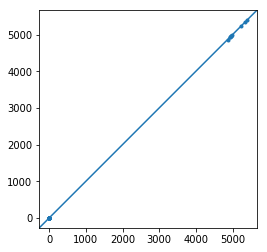

In [40]:
ax = plt.subplot(111,aspect="equal") 
wl_names = [n for n in pst.nnz_obs_names if n.startswith("c")]
ax.scatter(pst.res.loc[wl_names,"modelled"],pst.res.loc[wl_names,"measured"],marker='.')
ylim,xlim = ax.get_ylim(),ax.get_xlim()
mn = min(ylim[0],xlim[0])
mx = max(ylim[1],xlim[1])
ax.plot([mn,mx],[mn,mx])
ax.set_ylim(mn,mx)
ax.set_xlim(mn,mx)

In [41]:
pst.phi

4.379462893910711e-05

In [42]:
# pst.observation_data
pst.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
a001,a001,5.524717e+03,1.0,obgnme
a002,a002,5.227226e+03,1.0,obgnme
a003,a003,5.260891e+03,1.0,obgnme
a005,a005,5.465481e+03,1.0,obgnme
a006,a006,5.500308e+03,1.0,obgnme
a007,a007,5.254098e+03,1.0,obgnme
a008,a008,5.274991e+03,1.0,obgnme
a013,a013,5.222652e+03,1.0,obgnme
a014,a014,5.226906e+03,1.0,obgnme


In [85]:
## change obs wt.
obs = pst.observation_data
obs.loc[obs.obgnme=="","weight"] = 0.05 #super subjective
pst.write(os.path.join(working_dir,pst_name))

In [ ]:
## non-zero wt obs

# pst.observation_data.loc[pst.nnz_obs_names,:]
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.res.loc[pst.nnz_obs_names]

In [20]:
obs = pst.observation_data
obs.loc[obs.obgnme=="a","weight"] = 0.05 #super subjective
obs.loc[obs.obgnme=="b","weight"] = 0.05 #super subjective
pst.observation_data.loc[pst.nnz_obs_names,:]

pst.write(os.path.join(working_dir,pst_name))

In [ ]:
# computes residuals

df_res = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".rei")),index_col=0)
df_res

In [ ]:
### We can look at the other residuals

pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.res